# **Assignment 4 (Part C)**

---



Dimensions of the dataset:
 (10, 7)

Column names in the dataset:
 Index(['Brand', 'Price', 'Availability', 'Taste', 'Flavour', 'Consistency',
       'Shelflife'],
      dtype='object')

First few rows of the dataset:
      Brand  Price  Availability  Taste  Flavour  Consistency  Shelflife
0     Amul      4             5      4        3            4          3
1  Nandini      3             2      3        2            3          3
2  Vadilal      2             2      4        3            4          4
3   Vijaya      3             1      3        5            3          4
4    Dodla      3             3      3        4            4          3

Structure of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         10 non-null     object
 1   Price         10 non-null     int64 
 2   Availability  10 non-null     int64 
 3   Taste

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


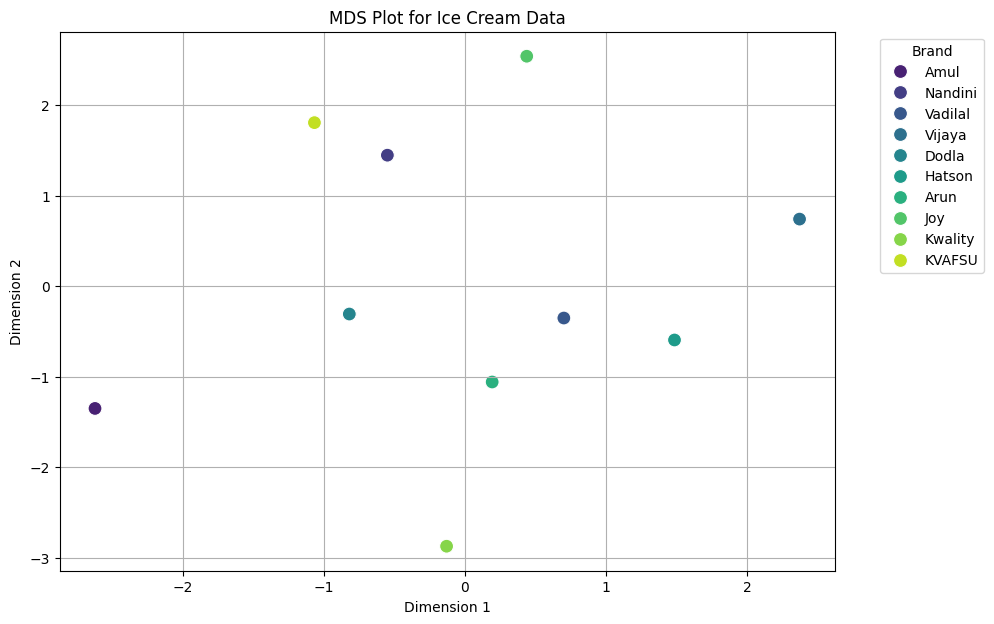


Interpretation of MDS Results:
The MDS plot shows the relative positions of the different ice cream brands based on the provided variables.
Points that are closer together represent brands that are more similar to each other in terms of the variables used.
The axes (Dimension 1 and Dimension 2) do not have intrinsic meanings but are used to visualize the distances between the points.


In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform



# Load the ice cream data
icecream_df = pd.read_csv('icecream.csv')

# Display dimensions and column names of the dataset
print("Dimensions of the dataset:\n", icecream_df.shape)
print("\nColumn names in the dataset:\n", icecream_df.columns)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:\n", icecream_df.head())

# Display the structure of the dataset
print("\nStructure of the dataset:\n")
print(icecream_df.info())

# Check for missing values
print("\nChecking for missing values:\n", icecream_df.isnull().sum().sum())

# Remove the 'Brand' column for analysis
ice = icecream_df.drop(columns=['Brand'])

# Display the structure and dimensions of the selected data subset
print("\nStructure of the selected data subset:\n")
print(ice.info())

print("\nDimensions of the selected data subset:\n", ice.shape)

# Calculate the distance matrix
distance_matrix = squareform(pdist(ice, metric='euclidean'))
distance_matrix

# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(distance_matrix)

# Create a DataFrame for MDS results
mds_df = pd.DataFrame(mds_result, columns=['Dimension1', 'Dimension2'])
mds_df['Brand'] = icecream_df['Brand']

# Plot MDS results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dimension1', y='Dimension2', data=mds_df, hue='Brand', palette='viridis', s=100)
plt.title('MDS Plot for Ice Cream Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Interpretation
print("\nInterpretation of MDS Results:")
print("The MDS plot shows the relative positions of the different ice cream brands based on the provided variables.")
print("Points that are closer together represent brands that are more similar to each other in terms of the variables used.")
print("The axes (Dimension 1 and Dimension 2) do not have intrinsic meanings but are used to visualize the distances between the points.")


In [8]:
mds_result

array([[-2.62195098, -1.34984549],
       [-0.54978178,  1.44644082],
       [ 0.70097066, -0.35164828],
       [ 2.37140882,  0.74080616],
       [-0.8195624 , -0.3074068 ],
       [ 1.48514789, -0.59406721],
       [ 0.19284109, -1.05795669],
       [ 0.4378845 ,  2.5391513 ],
       [-0.13017848, -2.87131272],
       [-1.06677933,  1.80583891]])